In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
loan_data = pd.read_csv('LendingClubDataSet/loan_data.csv')
input_data = pd.read_csv('LendingClubDataSet/input.csv')
output_data = pd.read_csv('LendingClubDataSet/output.csv')

In [9]:
print(loan_data.head())
print(input_data.head())
print(output_data.head())

   credit.policy             purpose  ...  pub.rec  not.fully.paid
0              1  debt_consolidation  ...        0               0
1              1         credit_card  ...        0               0
2              1  debt_consolidation  ...        0               0
3              1  debt_consolidation  ...        0               0
4              1         credit_card  ...        0               0

[5 rows x 14 columns]
   1  0.1189   829.1  11.35040654  19.48  737  ...  0.3  0.4  1.1  0.5  0.6  0.7
0  1  0.1071  228.22    11.082143  14.29  707  ...    0    1    0    0    0    0
1  1  0.1357  366.86    10.373491  11.63  682  ...    0    0    1    0    0    0
2  1  0.1008  162.34    11.350407   8.10  712  ...    0    0    1    0    0    0
3  1  0.1426  102.92    11.299732  14.97  667  ...    0    1    0    0    0    0
4  1  0.0788  125.13    11.904968  16.98  727  ...    0    1    0    0    0    0

[5 rows x 18 columns]
   0  1
0  0  1
1  0  1
2  0  1
3  0  1
4  0  1


In [0]:
print(input_data.shape)
print(output_data.shape)

(9577, 18)
(9577, 2)


In [10]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [12]:
loan_data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

## 1.  **Feature Transformation**

Transform categorical values into numerical values (discrete)

In [0]:
from sklearn.preprocessing import  LabelEncoder

le_purpose = LabelEncoder()
le_purpose.fit(loan_data['purpose'])
loan_data['purpose'] = le_purpose.transform(loan_data['purpose'])

In [14]:
loan_data.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,2,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,0,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,4,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,2,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


## **2.     Exploratory data analysis of different factors of the dataset.**

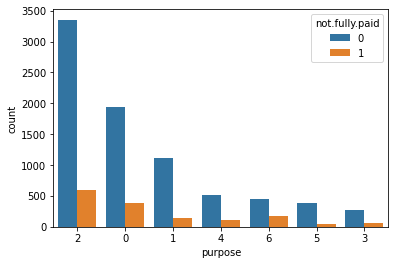

In [15]:
sns.countplot(x='purpose', data=loan_data, hue='not.fully.paid', order=loan_data.purpose.value_counts().index)

In [0]:
#print(pd.DataFrame(le_purpose.classes_[[2, 0, 1, 4, 6, 5, 3]], index=[2, 0, 1, 4, 6, 5, 3]))

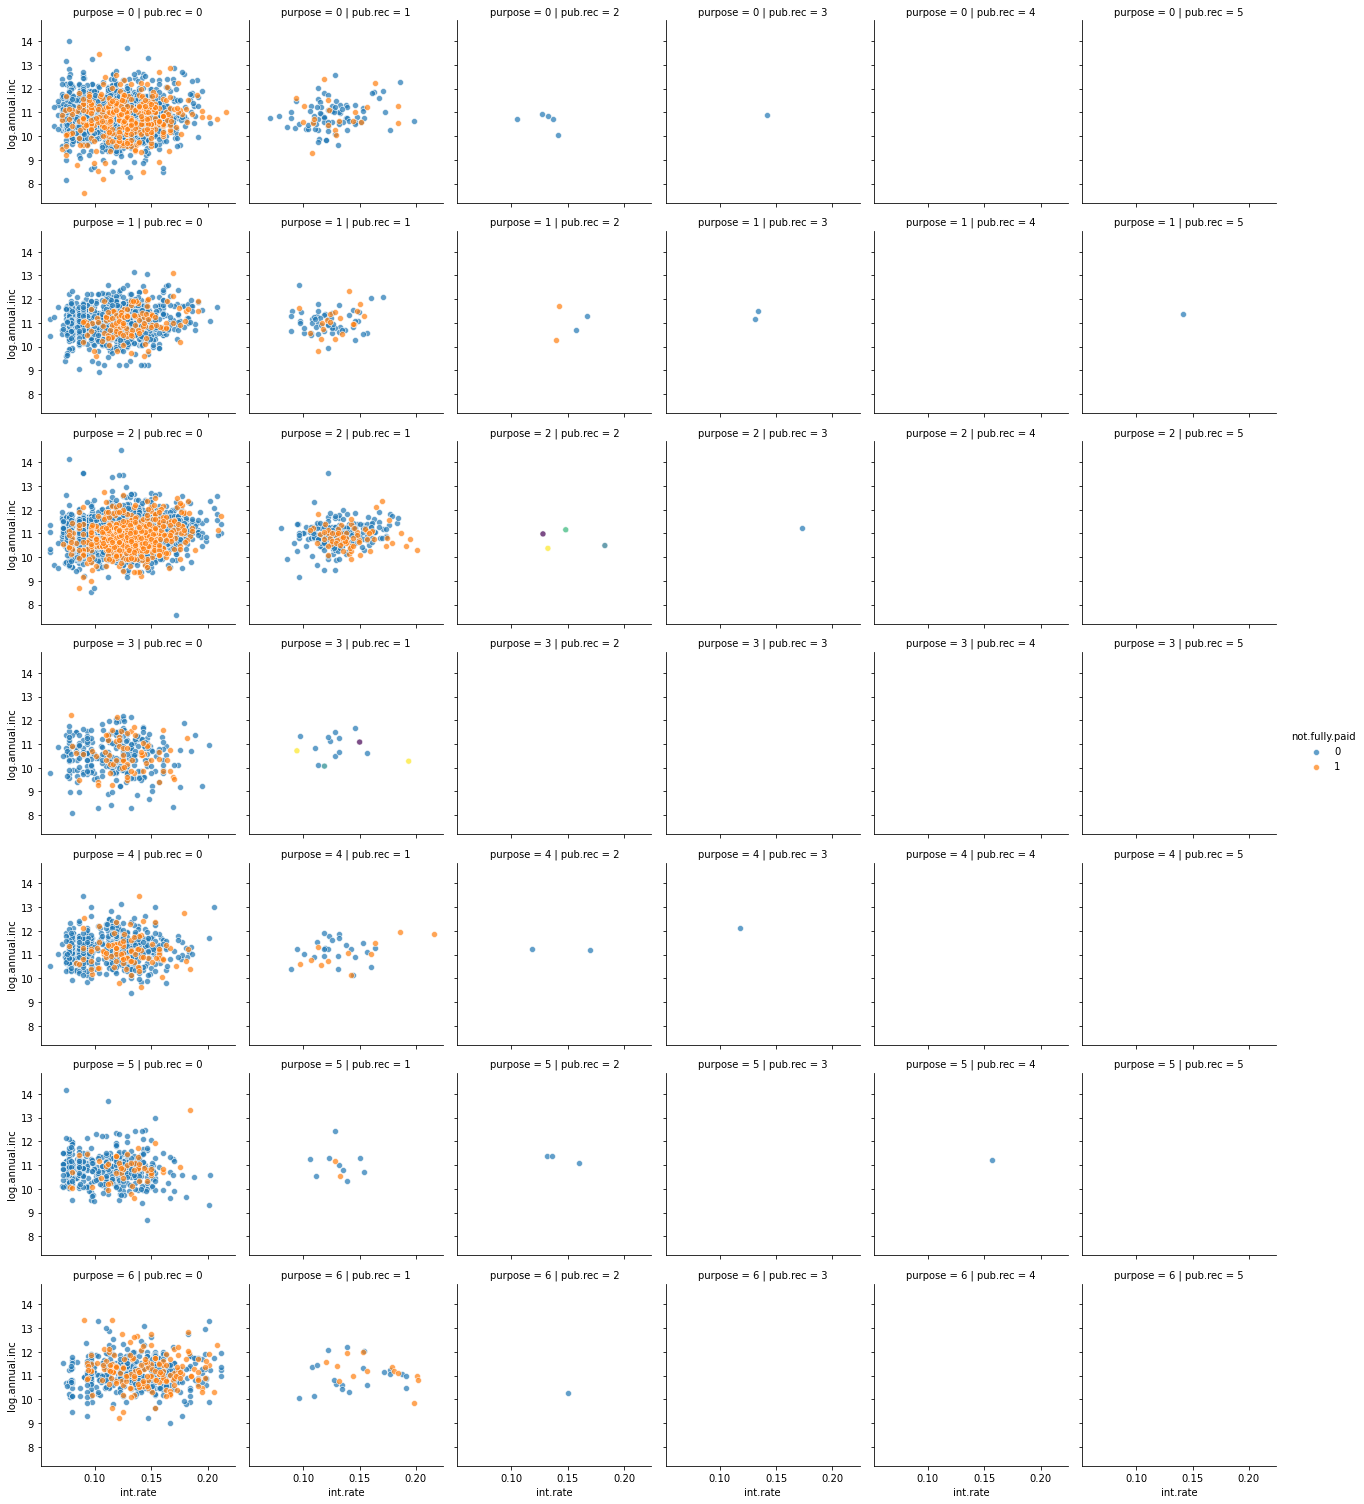

In [16]:
fg = sns.FacetGrid(data=loan_data, row='purpose', col='pub.rec', hue='not.fully.paid')
fg.map(sns.scatterplot, 'int.rate', 'log.annual.inc', alpha=0.7)
fg.add_legend()

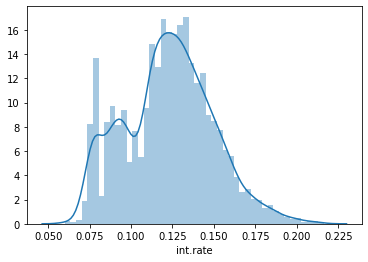

In [17]:
sns.distplot(loan_data['int.rate'])

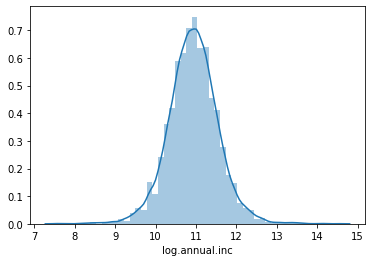

In [18]:
sns.distplot(loan_data['log.annual.inc'])

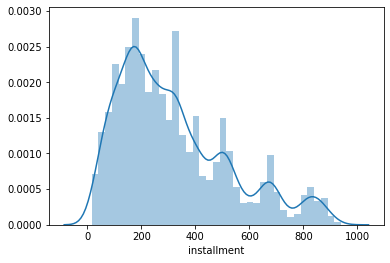

In [19]:
sns.distplot(loan_data['installment'])

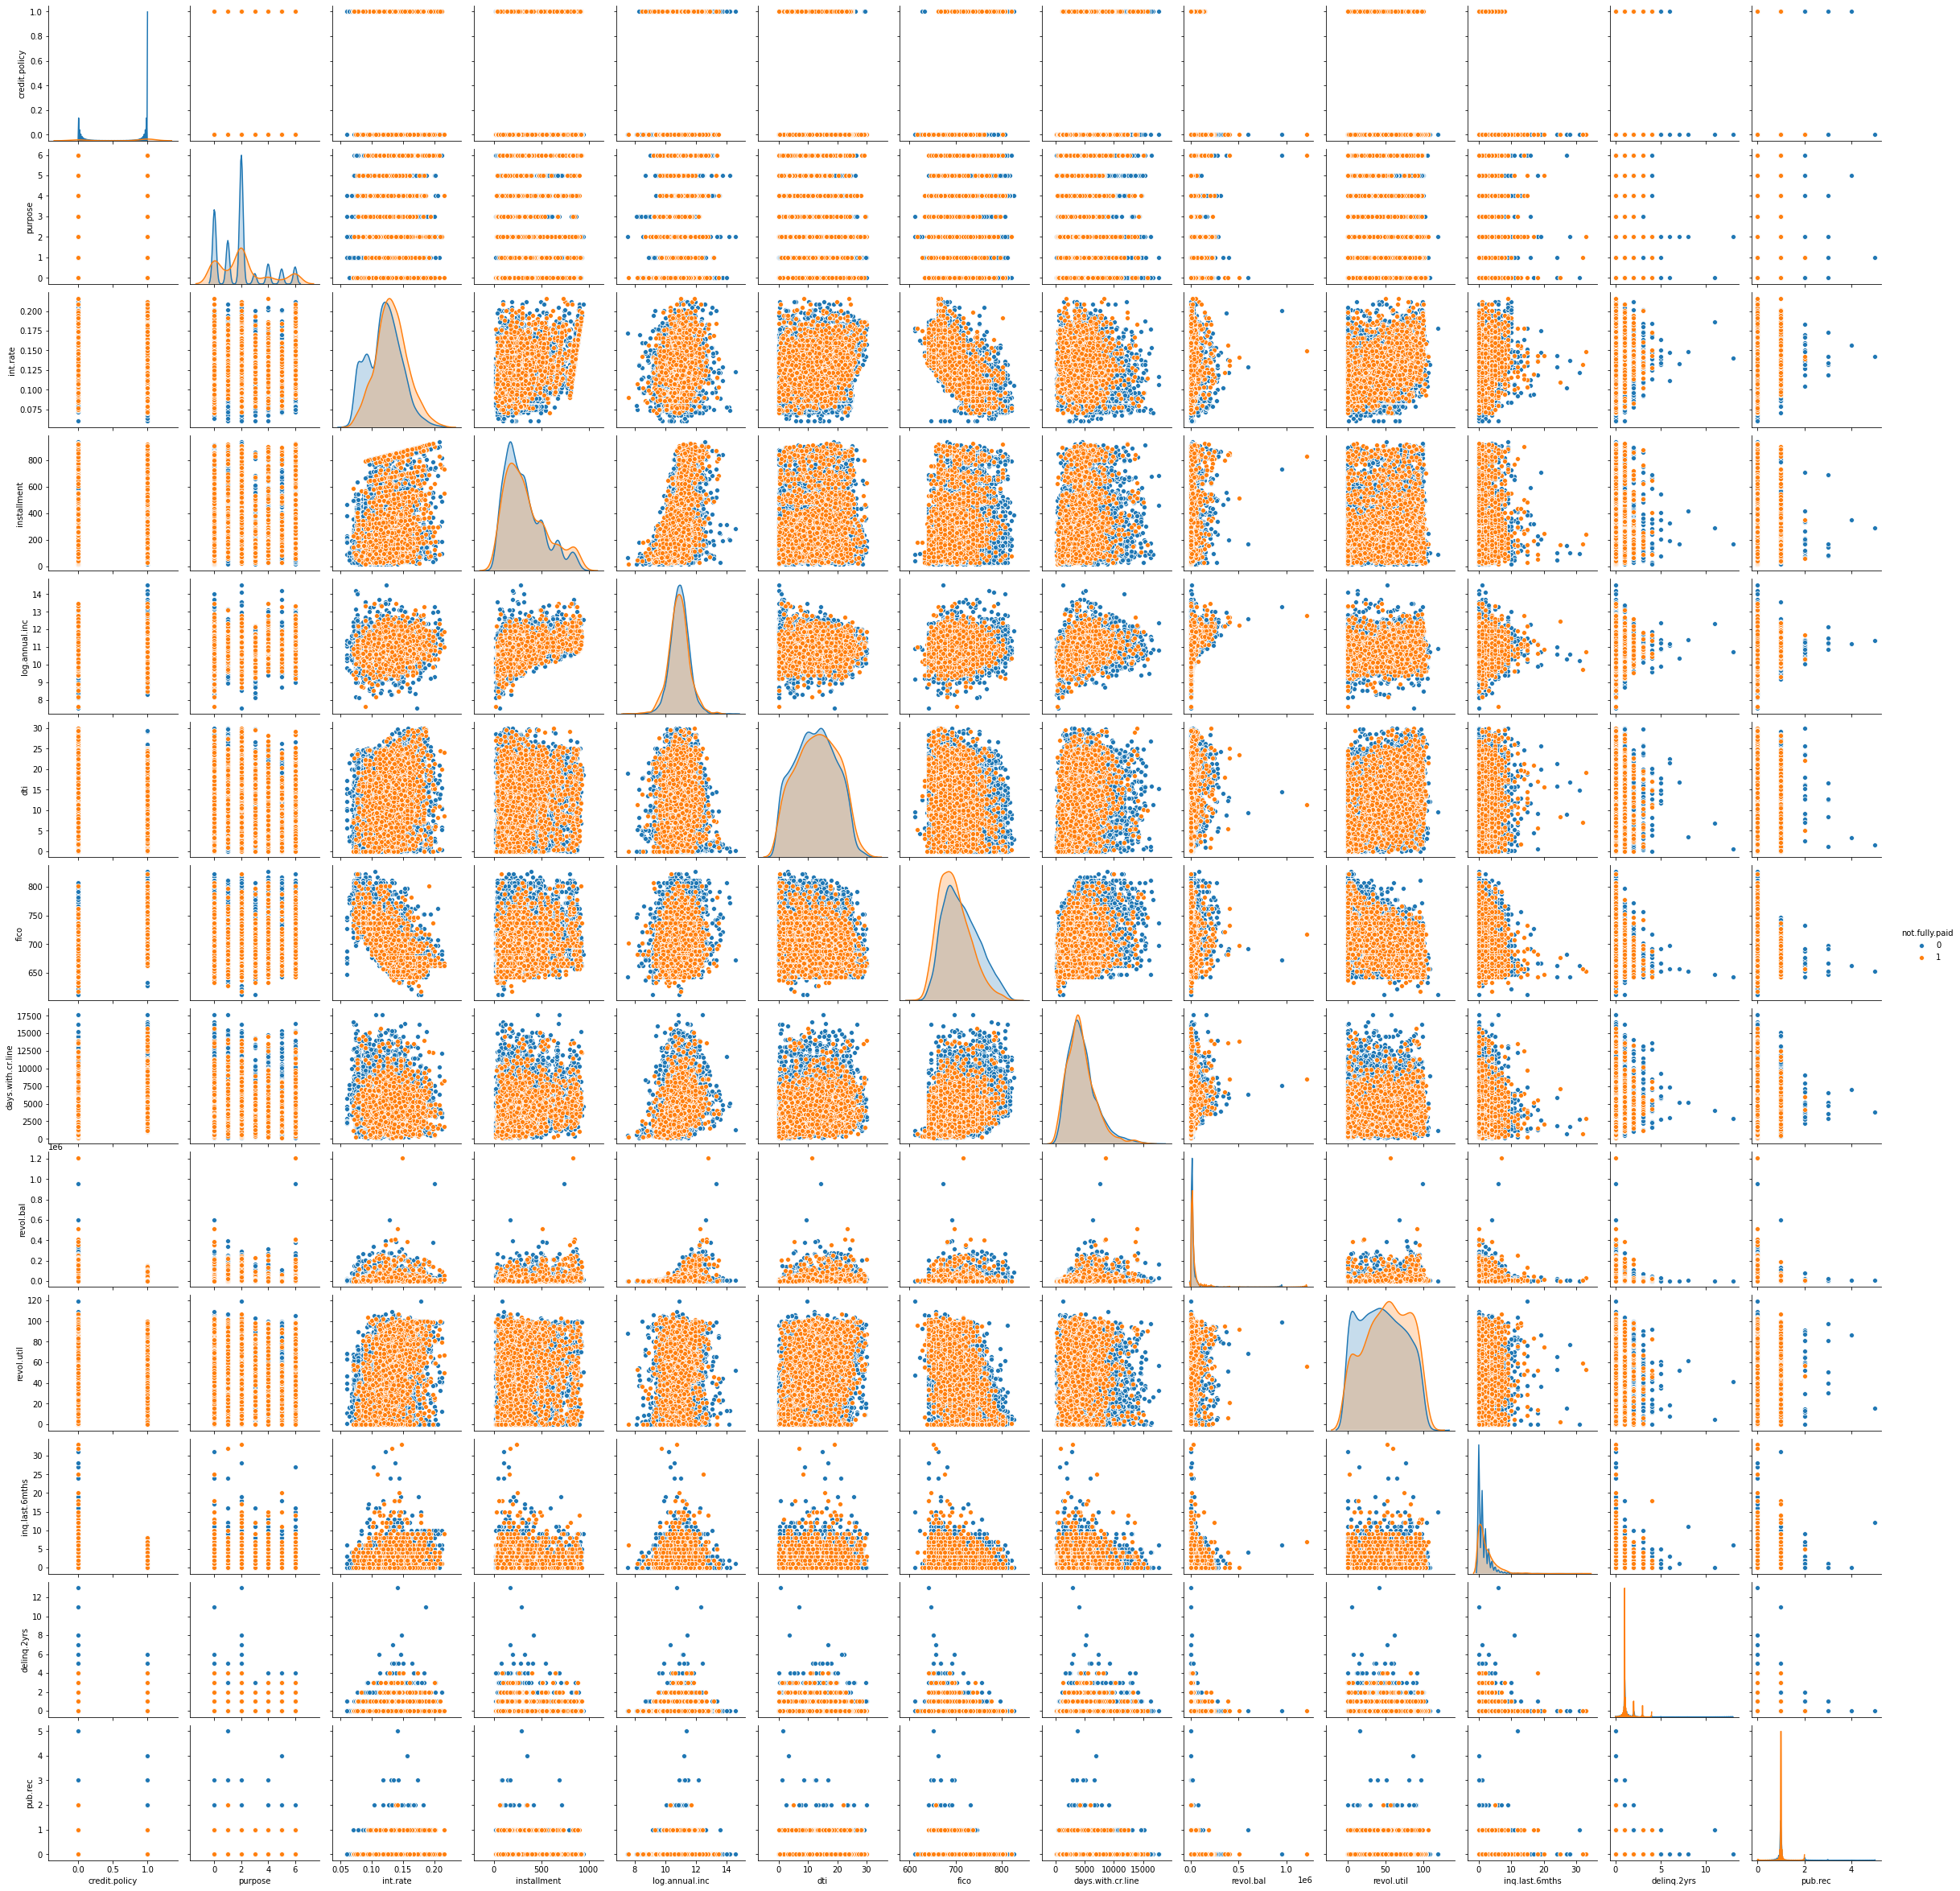

In [20]:
sns.pairplot(loan_data, hue='not.fully.paid')

## **3.     Additional Feature Engineering**

**You will check the correlation between features and will drop those features which have a strong correlation**

**This will help reduce the number of features and will leave you with the most relevant features**

In [0]:
data_corr = loan_data.corr()

In [22]:
data_corr

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.017569,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
purpose,0.017569,1.000000,0.117067,0.154827,0.088958,-0.053279,0.057337,0.047526,0.042364,-0.062947,0.037516,-0.011701,0.004793,0.047907
int.rate,-0.294089,0.117067,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.154827,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.088958,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,-0.053279,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,0.057337,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,0.047526,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.042364,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,-0.062947,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088


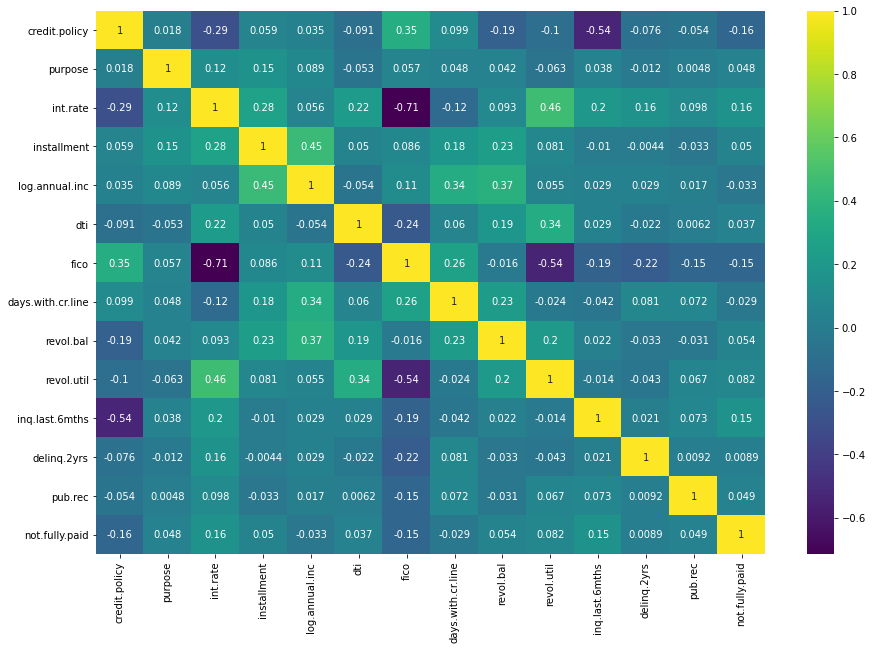

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_corr, cmap='viridis', annot=True)

In [24]:
data_corr[np.sqrt(np.square(data_corr['not.fully.paid']))>0.1]['not.fully.paid']

credit.policy    -0.158119
int.rate          0.159552
fico             -0.149666
inq.last.6mths    0.149452
not.fully.paid    1.000000
Name: not.fully.paid, dtype: float64

In [0]:
loan_data = pd.concat([pd.get_dummies(loan_data.purpose), loan_data.drop(['purpose'], axis=1)], axis=1)

In [26]:
loan_data.shape


(9578, 20)

## 4.     Modeling

In [0]:
def getValue(data):
  return np.argmax(data)

X = input_data.values
Y  = np.array(list(map(getValue, output_data.values)))

### Splitting training and test data

In [0]:
from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=672)
   

### Training the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential()


# input layer
model.add(Dense(18,  activation='relu'))

# hidden layer
model.add(Dense(18, activation='relu'))

# hidden layer
model.add(Dense(18, activation='relu'))


# output layer
model.add(Dense(1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [40]:
model.fit(
          x=x_train, y=y_train, 
          epochs=30,
          batch_size=256
          )

Epoch 1/30
29/29 [==============================] - 0s 2ms/step - loss: 369.3065 - accuracy: 0.4741
Epoch 2/30
29/29 [==============================] - 0s 1ms/step - loss: 43.2962 - accuracy: 0.9390
Epoch 3/30
29/29 [==============================] - 0s 1ms/step - loss: 11.3953 - accuracy: 0.8929
Epoch 4/30
29/29 [==============================] - 0s 1ms/step - loss: 4.9172 - accuracy: 0.8995
Epoch 5/30
29/29 [==============================] - 0s 1ms/step - loss: 3.6563 - accuracy: 0.9052
Epoch 6/30
29/29 [==============================] - 0s 2ms/step - loss: 3.5482 - accuracy: 0.8946
Epoch 7/30
29/29 [==============================] - 0s 2ms/step - loss: 2.5775 - accuracy: 0.8967
Epoch 8/30
29/29 [==============================] - 0s 1ms/step - loss: 3.1088 - accuracy: 0.8942
Epoch 9/30
29/29 [==============================] - 0s 1ms/step - loss: 2.7599 - accuracy: 0.8957
Epoch 10/30
29/29 [==============================] - 0s 1ms/step - loss: 1.6158 - accuracy: 0.8972
Epoch 11/30
29/

In [0]:
predictions = model.predict_classes(x_test)

### **Evaluation**

In [0]:
from sklearn.metrics import  classification_report, confusion_matrix

In [42]:
confusion_matrix(y_test, predictions)

array([[  17,  164],
       [ 148, 2066]])

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.10      0.09      0.10       181
           1       0.93      0.93      0.93      2214

    accuracy                           0.87      2395
   macro avg       0.51      0.51      0.51      2395
weighted avg       0.86      0.87      0.87      2395

